In [ ]:
# Eric Gonzalez 
# Znumber:Z23411215
# This is assignment 2, 3, 4 and 6
#Asssignment 6 is to the bottom 

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random



In [ ]:
#Function definitions for assignment 3 question 2


class NeuralNetwork(object):

  def __init__(self,num_params=2):
    # using seed to make sure it will generate the same weights in every run
    np.random.seed(1)
# 3x1 weight matrix 
    self.weight_matrix=2*np.random.random((num_params +1,1))-1
    self.l_rate=1
  
    


  # hard-limiter as activation function    
  def hard_limiter(self,x):
    outs=np.zeros(x.shape)
    outs[x>=0]=1
    return outs

# forward propagation
  def forward_propagation(self,inputs):
    outs=np.dot(inputs,self.weight_matrix)
    return self.hard_limiter(outs)

  def pred(self,inputs):
    prob=self.forward_propagation(inputs)
    preds=np.int8(prob>=0.5)
    return preds


  # training the neural network

  def train(self,train_inputs, train_outputs, num_train_iterations=1000):


    # number of inputs we want for these inputs 
    for iteration in range(num_train_iterations):

      #updating the perceptron based on misclassified 
      for i in range(train_inputs.shape[0]):

        pred_i=self.pred(train_inputs[i,:])
        if pred_i!=train_outputs[i]:

          output=self.forward_propagation(train_inputs[1,:])
          error= train_outputs[i]-output
          adjustment= self.l_rate*error*train_inputs[i]
          #adjust the weight matrix
          self.weight_matrix[:,0]+=adjustment
          #plot the seperating line based on the weights 
          plot_fun_thr(train_inputs[:,0:2], train_outputs, self.weight_matrix[:,0],classes)

def plot_fun_thr(features, labels, three_params,classes):
    #plotting the data points
    plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^')
    plt.axis([-2,2,-2,2])
    #plotting the seperating line 
    x1=np.linspace(-2,3,50)
    x2=-(three_params[0]*x1+three_params[2])/three_params[1] #a x1+b x2 +c=0 --> x2=  -(a x1 + c)/b
    plt.plot(x1, x2, '-r')
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    #plt.pause(0.5)
    plt.show()


def plot_fun(features, labels,classes):
    #plotting the data points
    plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^')
    plt.axis([-2,2,-2,2])
    #plotting the seperating line 
    x1=np.linspace(-1,2,50)
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    #plt.pause(0.5)
    plt.show()


       


def filter_data(x,y):
  filt=(y==1)|(y==0)
  x=x[filt]
  y=y[filt]

  y=y==0

  return x,y


def plot_model(class_x,class_y):
  index=0
  colors=['g^','ro']


  for x,y in zip(class_x, class_y):
    plt.plot(x,y, colors[index],label=f"class {index}")  
    index=index+1


  plt.xlabel(f"Sample number")
  plt.ylabel(f"Average pixel")
  plt.legend(loc='upper right')


  plt.axis([0,500,0,300])
  plt.show()



def calc_av(rows,columns,train_img):
  pixels_sum=pixels_count=0
  half=(rows/2)-1
  for r in range(rows):
    if (r>=half-1 and r<=half+1):
      for col in range(columns):
        if (col>=half and col<=half+2):
          pixels_count=pixels_count+1
          pixels_sum=pixels_sum + train_img[r,col]
  return pixels_sum/pixels_count



def feat_plt(feature,labels):
 plt.figure()
 sample_nums=np.arange(feature.shape[0])
 plt.plot(sample_nums[labels==0],feature[labels==0],'gs', sample_nums[labels==1],feature[labels==1],'r^')
 plt.xlabel('Sample #')
 plt.ylabel('Average of the 3x3 center grid')
 plt.show


#define accuracy functions
def acc_fun(labels_actual, labels_pred):
 acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
 return acc


#define the required plots
def img_plt(images, labels):
 plt.figure() #figsize=(15,8)
 for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(images[i-1,:,:],cmap='gray')
  plt.title('Label: ' + str(labels[i-1]))
 plt.show()

def calc_acc(x, y, dataset, max_sample, threshold):
  sample=0
  class1_x=[]
  class1_y=[]
  class0_x=[]
  class0_y=[]

  class_x=[class0_x,class1_x]
  class_y=[class0_y,class1_y]

  correctly_classified=0

  while sample<max_sample:
    average=calc_av(28,28,x[sample, :,:])
    if (not y[sample]):
      class1_x.append(sample)
      class1_y.append(average)
    else:
      class0_x.append(sample)
      class0_y.append(average)
  
    if ((average>threshold) and not y[sample]):
      correctly_classified=correctly_classified+1
    elif (not (average>threshold) and y[sample]):
      correctly_classified=correctly_classified+1
    sample=sample+1

  print(f"The accuracy of the {dataset} is {(correctly_classified/max_sample):.2f}")
  plot_model(class_x,class_y)


In [ ]:
#   # main
# (x_train, y_train),(x_test, y_test)=mnist.load_data()

# x_train, y_train=filter_data(x_train, y_train) #filtered training set
# x_test, y_test=filter_data(x_test, y_test) #filtered test set

# #plot samples
# print('Samples of the training images')
# img_plt(x_train[0:10,:,:],y_train[0:10])

# # shuffles the training set
# train_img=x_train.shape[0]
# train_ind=np.arange(0,train_img)


# # returns a list of random images 
# train_ind_s=np.random.permutation(train_ind)
# x_train=x_train[train_ind_s,:,:]
# y_train=y_train[train_ind_s]


# # shuffles the testing set 
# test_ins_s=np.random.permutation(np.arange(0,x_test.shape[0]))
# x_test=x_test[test_ins_s, :,:]
# y_test=y_test[test_ins_s]


# # selects 80% for validation
# x_valid=x_train[0:int(.8*train_img),:,:]
# y_valid=y_train[0:int(.8*train_img)]

# calc_acc(x_valid, y_valid, "Validation", 500, 95)

# # 20% for testing
# x_train=x_train[0:int(.2*train_img),:,:]
# y_train=y_train[0:int(.2*train_img)]
# calc_acc(x_test, y_test, "Testing", 500, 95)
# calc_acc(x_train, y_train, "Training", 500, 95)



Samples of the training images


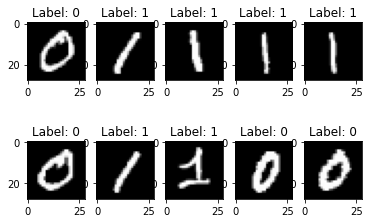

In [ ]:
#main two

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Selecting only 0 and 1 digits from the training and testing sets
x_train_01=x_train[np.logical_or(y_train==0,y_train==1),0:28,0:28] 
# why "y" passed?
y_train_01=y_train[np.logical_or(y_train==0,y_train==1)]
print('Samples of the training images')
img_plt(x_train_01[0:10,:,:],y_train_01[0:10])


Samples of the testing images


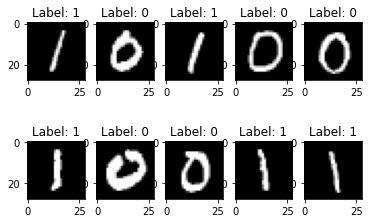

In [ ]:
x_test_01=x_test[np.logical_or(y_test==0,y_test==1),0:28,0:28]
y_test_01=y_test[np.logical_or(y_test==0,y_test==1)]
print('Samples of the testing images')
img_plt(x_test_01[0:10,:,:],y_test_01[0:10])

Samples of the validation images


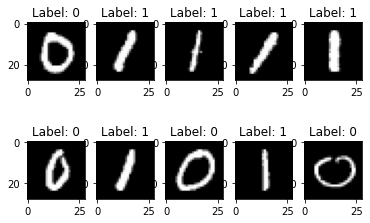

In [ ]:
#Selecting 500 images from training data as the validation set
#shuffling trainig data
num_train_img=x_train_01.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train_01=x_train_01[train_ind_s,:,:]
y_train_01=y_train_01[train_ind_s]
#Selecting 500 images for validation
x_val_01=x_train_01[0:500,:,:]
y_val_01=y_train_01[0:500]
#The rest of the training set
x_train_01=x_train_01[500:,:,:]
y_train_01=y_train_01[500:]
print('Samples of the validation images')
img_plt(x_val_01[0:10,:,:],y_val_01[0:10])

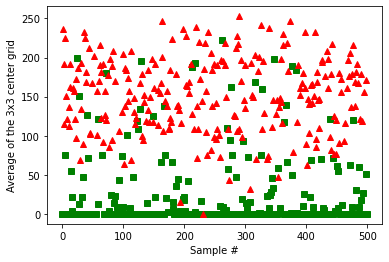

In [ ]:
#Calculating the training, validation and testing feature (average of the center grid)
feature_train=np.sum(x_train_01[:,12:15,12:15],axis=2)
feature_train=np.sum(feature_train,axis=1)/9
feature_val=np.sum(x_val_01[:,12:15,12:15],axis=2)
feature_val=np.sum(feature_val,axis=1)/9
feature_test=np.sum(x_test_01[:,12:15,12:15],axis=2)
feature_test=np.sum(feature_test,axis=1)/9
feat_plt(feature_val,y_val_01)

In [ ]:
while True:
 threshold_i=input('The selected threshod based on the validation data is: ')
 y_val_01_pred=np.uint8(feature_val>int(threshold_i))
 print('The validation accuracy is ' + str(acc_fun(y_val_01,y_val_01_pred)))
 x=input('If you finalized the threshold enter x :')
 if x=='x':
  break
y_train_01_pred=np.uint8(feature_train>int(threshold_i))
print('The training accuracy is ' + str(acc_fun(y_train_01,y_train_01_pred)))
y_test_01_pred=np.uint8(feature_test>int(threshold_i))
print('The testing accuracy is ' + str(acc_fun(y_test_01,y_test_01_pred)))

The selected threshod based on the validation data is: 50
The validation accuracy is 89.0
If you finalized the threshold enter x :55
The selected threshod based on the validation data is: 55
The validation accuracy is 89.60000000000001
If you finalized the threshold enter x :no
The selected threshod based on the validation data is: 60
The validation accuracy is 90.2
If you finalized the threshold enter x :no
The selected threshod based on the validation data is: 65
The validation accuracy is 90.2
If you finalized the threshold enter x :no 
The selected threshod based on the validation data is: 70
The validation accuracy is 90.4
If you finalized the threshold enter x :x
The training accuracy is 89.76572133168928
The testing accuracy is 90.92198581560284


[[ 1  1]
 [ 1  0]
 [ 0  1]
 [-1 -1]
 [-1  0]
 [-1  1]]
[1 1 0 0 0 0]


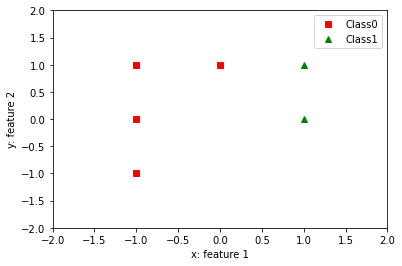

In [ ]:
# Homework 3 starts here: Homework 3 question 1
# Eric Gonzalez
features= np.array([[1,1],[1,0],[0,1],[-1,-1],[-1,0],[-1,1]])
print(features)
labels=np.array([1,1,0,0,0,0])
print(labels)
classes=[0,1]

plot_fun(features, labels, classes)

In [ ]:
bias=np.ones((features.shape[0],1))
print(bias)
features=np.append(features,bias, axis=1)
print(features)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[ 1.  1.  1.]
 [ 1.  0.  1.]
 [ 0.  1.  1.]
 [-1. -1.  1.]
 [-1.  0.  1.]
 [-1.  1.  1.]]


Random weights at the start of the training 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


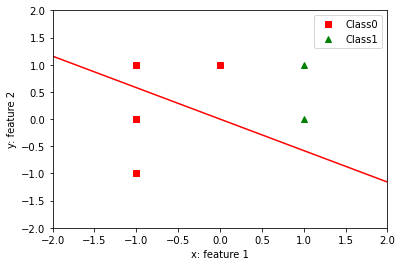

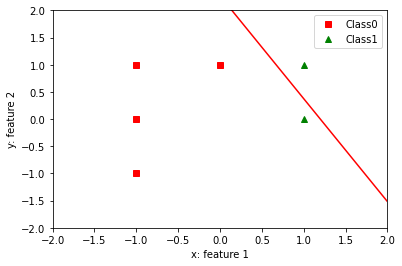

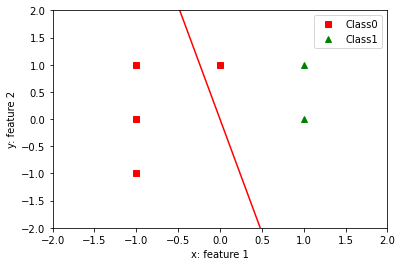

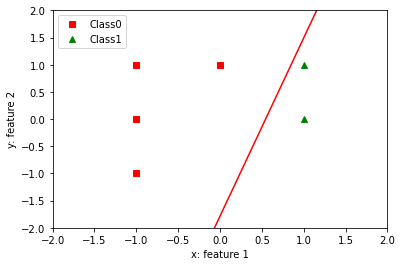

New weights after the training 
[[ 1.83404401]
 [-0.55935101]
 [-0.99977125]]
Testing the neural network on the training data points
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]]
Testing the network on a new data points
[1]
[1]
[0]
[0]


In [ ]:
neural_network=NeuralNetwork()
print('Random weights at the start of the training ')
print(neural_network.weight_matrix)
neural_network.train(features, labels, 20)


print(f"New weights after the training ")
print(neural_network.weight_matrix)


#test the neural network with the training data points
print(f"Testing the neural network on the training data points")
print(neural_network.pred(features))

#testing the neural network with a new data point 
print(f"Testing the network on a new data points")
print(neural_network.pred(np.array([2,0,1])))
print(neural_network.pred(np.array([2,1,0])))
print(neural_network.pred(np.array([0,0,1])))
print(neural_network.pred(np.array([-2,0,0])))

[[ 1  1]
 [ 1  0]
 [ 0  1]
 [-1 -1]
 [-1  0]
 [-1  1]]
[1 1 0 0 0 0]


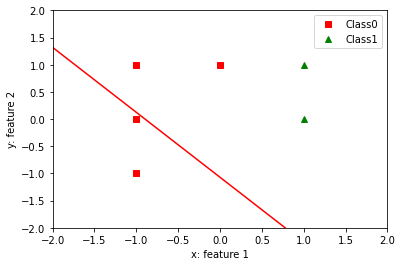

The weight vector after the first three iterations is:[0.872 0.73  0.781]


In [ ]:
features= np.array([[1,1],[1,0],[0,1],[-1,-1],[-1,0],[-1,1]])
print(features)
labels=np.array([1,1,0,0,0,0])
print(labels)
classes=[0,1]

line_hw=np.array([.872,.730,.781])
plot_fun_thr(features, labels, line_hw,classes)
print(f"The weight vector after the first three iterations is:{line_hw}")

In [ ]:
# Homework 3 Q3 code begins here!
# Eric Gonzalez 
# Z23411215
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
#Function definitions for assignemnt 3 problem 3
class Neural_Network():
  def __init__(self,l_rate):
# 3x1 weight matrix 
    np.random.seed(1)
    self.wv=2*np.random.rand(3)-1
    self.l_rate=l_rate
    self.prev_wv=[self.wv]
    self.cost=[]

  # hard-limiter as activation function    
  def hard_limiter(self,x):
    outs=np.zeros(x.shape)
    outs[x>=0]=1
    return outs

# forward propagation
  def forward_propagation(self,data):
    return np.dot(data,self.wv)
    

  def pred(self,data):
    prob=self.forward_propagation(data)
    prob[prob>=1]=1
    prob[prob<=-1]=-1
    return prob

  def train_GDL(self, inputs, labels, num_epochs=10):

    # number of inputs we want for these inputs
    i=0
    errors=[]
    errors_sq=[]
    fig, axs=plt.subplots(1,4,figsize=(15,5))  
    plot_fun_gdl(axs[0],inputs, labels, self.wv,self.l_rate, [-1,1])
    for iteration in range(num_epochs):
      if iteration%5==0:  
        plot_fun_gdl(axs[0],inputs, labels, self.wv,self.l_rate, [-1,1])
      for data in inputs:
        actual=self.forward_propagation(data)
        errors.append(np.dot(labels[i]-actual,data))
        errors_sq.append(np.square(labels[i]-actual))

        i=i+1
        if i ==inputs.shape[0]:
          wv_new=np.zeros(shape=self.wv.shape)
          for dex in range(wv_new.shape[0]):
            wv_new[dex]=(self.l_rate/inputs.shape[0])*np.sum(np.asarray(errors)[:,dex])
          self.wv=np.add(self.wv,wv_new)
          self.prev_wv.append(self.wv)
          self.cost.append((1/(2*inputs.shape[0])*np.sum(errors_sq)))
          learning_curves(axs[2], np.asarray(self.cost), self.l_rate, num_epochs)
      i=0
      errors.clear()
      errors_sq.clear()
    plot_fun_gdl(axs[1],inputs, labels, self.wv,self.l_rate, [-1,1])
    learning_curves(axs[3], np.asarray(self.cost), self.l_rate, num_epochs)
    plt.tight_layout()
    plt.show()

def plot_fun_gdl(axs,features, labels, wv,l_rate, classes):
  colors=['rs', 'g^']
  for i in range(len(classes)):
    axs.plot(features[labels[:]==classes[i],0],features[labels[:]==classes[i],1], colors[i])     
      
    #plotting the seperating line 
  x1=np.linspace(-6,6,100)
  x2= -(wv[0]*x1+wv[2])/wv[1]
  axs.plot(x1, x2, '-r')
  axs.axis([-4,4,-4,4])
  axs.set_title(f" For learning rate={l_rate}")
  axs.set_xlabel('x: feature 1')
  axs.set_ylabel('y: feature 2')
  axs.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
   
def learning_curves(axs, cost, l_rate, epochs):
  x=np.linspace(1,epochs,cost.shape[0])
  axs.plot(x,cost)
  axs.set_xlabel('Iteration')
  axs.set_ylabel('Average cost function')
  axs.set_title(f" For learning rate={l_rate}")

[[ 1.   1.   1. ]
 [ 1.   0.   1. ]
 [ 0.   1.   1. ]
 [-1.  -1.   1. ]
 [ 0.5  3.   1. ]
 [ 0.7  2.   1. ]
 [-1.   0.   1. ]
 [-1.   1.   1. ]
 [ 2.   0.   1. ]
 [-2.  -1.   1. ]]
[ 1  1 -1 -1  1  1 -1 -1  1 -1]
Random weights at the start of the training 
The randomized weight vector is: [-0.16595599  0.44064899 -0.99977125]


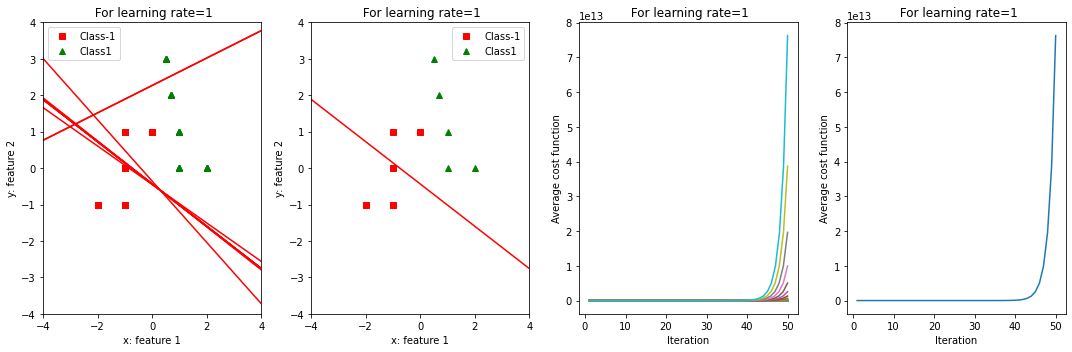

The updated weight vector is: [-5259417.17209519 -9050001.4051594  -3941835.53509984]


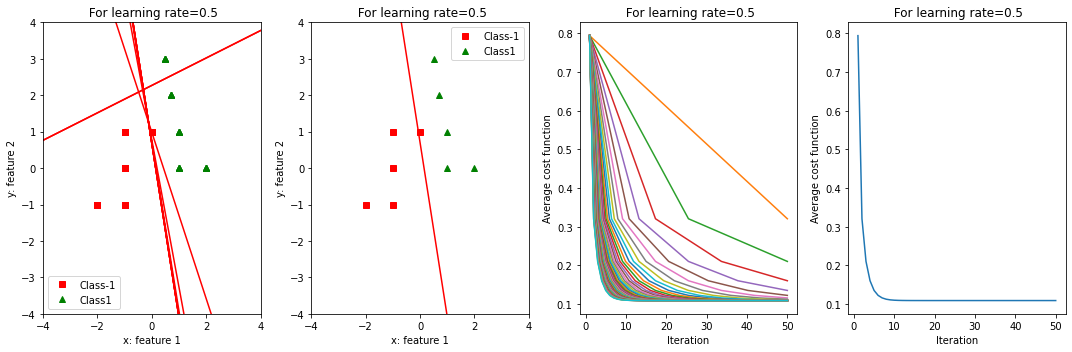

The updated weight vector is: [ 0.68252324  0.14270944 -0.09927616]


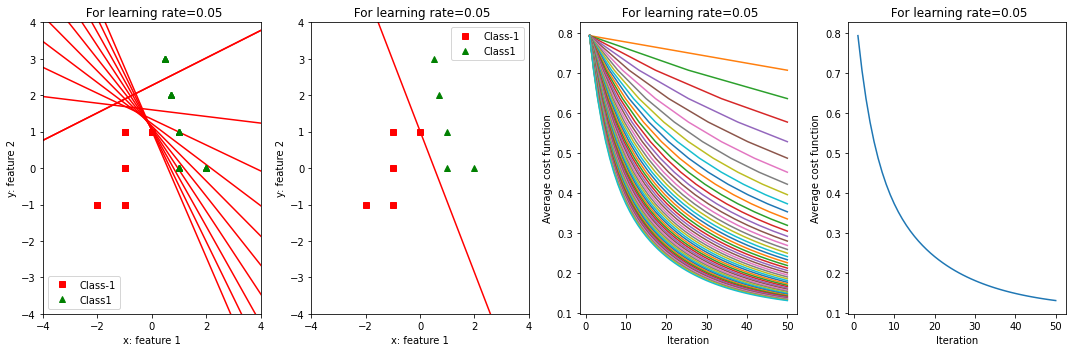

The updated weight vector is: [ 0.56946555  0.29355627 -0.29698777]


In [ ]:
# main function for assignment 3 number 3
neural_network=Neural_Network(1)
points= np.array([[1,1],[1,0],[0,1],[-1,-1],[0.5,3],[0.7,2],[-1,0],[-1,1],[2,0],[-2,-1]])
bias=np.ones((points.shape[0],1))
points=np.append(points,bias, axis=1)
labels=np.array([1,1,-1,-1,1,1,-1,-1,1,-1])
print(points)
print(labels)
print('Random weights at the start of the training ')
print(f"The randomized weight vector is: {neural_network.wv}")



neural_network.train_GDL(points, labels, 50)
print(f"The updated weight vector is: {neural_network.wv}")

neural_network=Neural_Network(0.5)
neural_network.train_GDL(points, labels, 50)
print(f"The updated weight vector is: {neural_network.wv}")

neural_network=Neural_Network(0.05)
neural_network.train_GDL(points, labels, 50)
print(f"The updated weight vector is: {neural_network.wv}")

In [ ]:
# This is the code block for lecture 3-16-21 with Murtadhda
# Eric Gonzalez 
# Znumber:Z23411215
# This is assignment 2 and 3 
#Asssignment 3 is closer to the bottom 

import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical


def plot_fun_thr(features,labels,thre_parms,classes): 
 #ploting the data points 
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[ 0],1], 'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1] ,1], 'g^', markersize=15) 
 #ploting the seperating line 
  x1 = np.linspace(-2,2,50) 
  x2 = -(thre_parms[0]*x1+thre_parms[2])/thre_parms[1] #a X1 + b X2 + c=0 -- > x2 = -(a X1 + c)/b 
  plt.plot(x1, x2, '-r') 
  plt.xlabel('x: feature 1') 
  plt.ylabel('y: feature 2') 
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])  
  plt.show()
def plot_curve1(accuracy_train,loss_train,epochs):
  fig, axs=plt.subplots(1,2,figsize=(9,5))
  

  a_curve=np.linspace(1,epochs,accuracy_train.shape[0])
  l_curve=np.linspace(1,epochs,loss_train.shape[0])

  axs[0].plot(a_curve,accuracy_train, '-r')
  axs[0].set_xlabel('Epoch #')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Training Accuracy')

  axs[1].plot(l_curve, loss_train, '-r')
  axs[1].set_xlabel('Epoch #')
  axs[1].set_ylabel('Binary Cross-Entropy Loss')
  axs[1].set_title('Training Loss')


  plt.tight_layout()
  plt.show() 



def plot_curve2(accuracy_train,loss_train):
  epochs=np.arange(loss_train.shape[0]) 
  fig, axs=plt.subplots(1,2,figsize=(9,5))

  axs[0].plot(epochs, accuracy_train, '-r')
  axs[0].set_xlabel('Epoch #')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Training Accuracy')

  axs[1].plot(epochs, loss_train, '-r')
  axs[1].set_xlabel('Epoch #')
  axs[1].set_ylabel('Binary Cross-Entropy Loss')
  axs[1].set_title('Training Loss')


  plt.tight_layout()
  plt.show() 

  
def plot_fun(features, labels,classes):
    #plotting the data points
    plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^')
    plt.axis([-2,2,-2,2])
    #plotting the seperating line 
    x1=np.linspace(-1,2,50)
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    #plt.pause(0.5)
    plt.show()

def feat_extract(image):
  width=image.shape[1]
  height=image.shape[2]
  feat=np.zeros((image.shape[0],4))

  feat_temp=np.sum(image[:,0:int(width/2),0:int(height/2)], axis=2)
  feat[:,0]=np.sum(feat_temp,axis=1)/(14*14)

  feat_temp=np.sum(image[:,0:int(width/2),0:int(height/2)], axis=2)
  feat[:,1]=np.sum(feat_temp,axis=1)/(14*14)

  feat_temp=np.sum(image[:,0:int(width/2),0:int(height/2)], axis=2)
  feat[:,2]=np.sum(feat_temp,axis=1)/(14*14)

  feat_temp=np.sum(image[:,0:int(width/2),0:int(height/2)], axis=2)
  feat[:,3]=np.sum(feat_temp,axis=1)/(14*14)

  return feat

def plot_model(datapoints, desired, wv, classes):
  colors=['rs', 'g^']
  for i in range(len(classes)):
    plt.plot(datapoints[desired[:]==classes[i],0],datapoints[desired[:]==classes[i],1], colors[i],label=f'Class {classes[i]}' )     
      
    #plotting the seperating line 
  x1=np.linspace(-2,2,50)
  x2= -(wv[0]*x1+wv[2])/wv[1]
  plt.plot(x1, x2, '-r')

  plt.axis([-1,2,-1,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')

   



  






In [ ]:
############################################################################################################################################################################################################################################################
#                                                                                                   Assignment 4 question 2
###############################################################################################################################################################################################################################################################

datapoints= np.array([[0,0],[0,1],[1,0],[1,1]])
labels=np.array([0,1,1,0])
classes=[0,1]

plot_fun(datapoints, labels, classes)
model_a=Sequential()
model_a.add(Dense(input_dim=2,units=2,activation='tanh'))
model_a.add(Dense(units=1,activation='sigmoid'))
model_a.compile(loss='binary_crossentropy',optimizer=SGD(0.1),metrics=['accuracy'])
history=model_a.fit(datapoints,labels,batch_size=1,epochs=200,verbose=1)

acc_curve=np.asarray(history.history['accuracy'])
loss_curve=np.asarray(history.history['loss'])
plot_curve1(acc_curve,loss_curve,200)
weights=model_a.layers[0].get_weights()
for i in range(weights[0].shape[1]):
  wv=np.array(weights[0][:,i])
  wv=np.append(wv, weights[1][i])
  plot_model(datapoints,labels, wv, [0,1])
plt.show()
model_a.summary()


In [ ]:
model_b=Sequential()
model_b.add(Dense(input_dim=2,units=4,activation='tanh'))
model_b.add(Dense(units=1,activation='sigmoid'))
model_b.compile(loss='binary_crossentropy',optimizer=SGD(0.1),metrics=['accuracy'])
history=model_b.fit(datapoints,labels,batch_size=1,epochs=400,verbose=1)

acc_curve=np.asarray(history.history['accuracy'])
loss_curve=np.asarray(history.history['loss'])
plot_curve1(acc_curve,loss_curve,200)
weights=model_b.layers[0].get_weights()
for i in range(weights[0].shape[1]):
  wv=np.array(weights[0][:,i])
  wv=np.append(wv, weights[1][i])
  plot_model(datapoints,labels, wv, [0,1])
plt.show()
model_b.summary()

In [ ]:
############################################################################################################################################################################################################################################################
#                                                                                       Assignment 4 question 3
###############################################################################################################################################################################################################################################################

  # main
(x_train, y_train),(x_test, y_test)=mnist.load_data()

x_train_red=x_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2)),0:28,0:28]
y_train_red=y_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2))]

x_test_red=x_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2)),0:28,0:28]
y_test_red=y_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2))]

classes=[0,1,2]

num_image_set=x_train_red.shape[0]
train_i=np.arange(0,num_image_set)
train_i_s=np.random.permutation(train_i)

x_train_red=x_train_red[train_i_s,:,:]
y_train_red=y_train_red[train_i_s]

x_val_red=x_train_red[0:int(0.2*num_image_set),:,:]
y_val_red= y_train_red[0:int(0.2*num_image_set)]


x_train_red=x_train_red[int(0.2*num_image_set):,:,:]
y_train_red=y_train_red[int(0.2*num_image_set):] 

num_image_set=x_test_red.shape[0]
test_i=np.arange(0,num_image_set)
test_i_s=np.random.permutation(test_i)

feat_train=feat_extract(x_train_red)
feat_valid=feat_extract(x_val_red)
feat_test=feat_extract(x_test_red)



y_train_red_c=to_categorical(y_train_red, len(classes))
y_val_red_c=to_categorical(y_val_red, len(classes))
y_test_red_c=to_categorical(y_test_red, len(classes))




model=Sequential()
model.add(Dense(input_dim=4,units=10,activation='tanh'))
# model.add(Dense(units=10,activation='tanh'))
model.add(Dense(units=len(classes),activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.0001),metrics=['accuracy'])
history=model.fit(np.asarray(feat_train),np.asarray(y_train_red_c),batch_size=16,epochs=50)
acc_curve=np.asarray(history.history['accuracy'])
loss_curve=np.asarray(history.history['loss'])
plot_curve2(acc_curve,loss_curve)

scores=model.evaluate(feat_train,y_train_red_c)
print(f'Training Set - Total Loss {scores[0]}')
print(f'Training Set - Total Accuracy {scores[1]}')

scores=model.evaluate(feat_valid,y_val_red_c)
print(f'Validation Set - Total Loss {scores[0]}')
print(f'Validation Set - Total Accuracy {scores[1]}')





In [ ]:
# 1-layer 50-Node 
model=Sequential()
model.add(Dense(input_dim=4,units=50,activation='tanh'))
# model.add(Dense(units=10,activation='tanh'))
model.add(Dense(units=len(classes),activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.0001),metrics=['accuracy'])
history=model.fit(np.asarray(feat_train),np.asarray(y_train_red_c),batch_size=16,epochs=50)
acc_curve=np.asarray(history.history['accuracy'])
loss_curve=np.asarray(history.history['loss'])
plot_curve2(acc_curve,loss_curve)

scores=model.evaluate(feat_train,y_train_red_c)
print(f'Training Set - Total Loss {scores[0]}')
print(f'Training Set - Total Accuracy {scores[1]}')

scores=model.evaluate(feat_valid,y_val_red_c)
print(f'Validation Set - Total Loss {scores[0]}')
print(f'Validation Set - Total Accuracy {scores[1]}')

In [ ]:
# 1-layer 100-Node 
model=Sequential()
model.add(Dense(input_dim=4,units=100,activation='tanh'))
# model.add(Dense(units=10,activation='tanh'))
model.add(Dense(units=len(classes),activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.0001),metrics=['accuracy'])
history=model.fit(np.asarray(feat_train),np.asarray(y_train_red_c),batch_size=16,epochs=50)
acc_curve=np.asarray(history.history['accuracy'])
loss_curve=np.asarray(history.history['loss'])
plot_curve2(acc_curve,loss_curve)

scores=model.evaluate(feat_train,y_train_red_c)
print(f'Training Set - Total Loss {scores[0]}')
print(f'Training Set - Total Accuracy {scores[1]}')

scores=model.evaluate(feat_valid,y_val_red_c)
print(f'Validation Set - Total Loss {scores[0]}')
print(f'Validation Set - Total Accuracy {scores[1]}')

In [ ]:
# 2-layer 100-Node, 10-Nodes 
model=Sequential()
model.add(Dense(input_dim=4,units=100,activation='tanh'))
model.add(Dense(units=10,activation='tanh'))
model.add(Dense(units=len(classes),activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.0001),metrics=['accuracy'])
history=model.fit(np.asarray(feat_train),np.asarray(y_train_red_c),batch_size=16,epochs=50)
acc_curve=np.asarray(history.history['accuracy'])
loss_curve=np.asarray(history.history['loss'])
plot_curve2(acc_curve,loss_curve)

scores=model.evaluate(feat_train,y_train_red_c)
print(f'Training Set - Total Loss {scores[0]}')
print(f'Training Set - Total Accuracy {scores[1]}')

scores=model.evaluate(feat_valid,y_val_red_c)
print(f'Validation Set - Total Loss {scores[0]}')
print(f'Validation Set - Total Accuracy {scores[1]}')

In [ ]:
# 2-layer 100-Node, 50-Nodes 
model=Sequential()
model.add(Dense(input_dim=4,units=50,activation='tanh'))
model.add(Dense(units=50,activation='tanh'))
model.add(Dense(units=len(classes),activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.0001),metrics=['accuracy'])
history=model.fit(np.asarray(feat_train),np.asarray(y_train_red_c),batch_size=16,epochs=50)
acc_curve=np.asarray(history.history['accuracy'])
loss_curve=np.asarray(history.history['loss'])
plot_curve2(acc_curve,loss_curve)

scores=model.evaluate(feat_train,y_train_red_c)
print(f'Training Set - Total Loss {scores[0]}')
print(f'Training Set - Total Accuracy {scores[1]}')

scores=model.evaluate(feat_valid,y_val_red_c)
print(f'Validation Set - Total Loss {scores[0]}')
print(f'Validation Set - Total Accuracy {scores[1]}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
############################################################################################################################################################################################################################################################
#                                                                                       Assignment 6 
###############################################################################################################################################################################################################################################################

# Eric Gonzalez 
# Znumber:Z23411215
# This is assignment 6






import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import glorot_uniform
from random import randint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers 
from tensorflow.keras import layers



Samples of the validation images


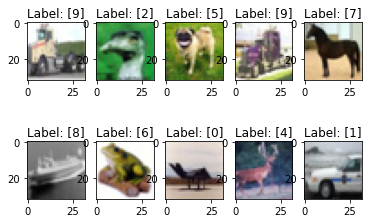

In [ ]:





def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train,epochs,accuracy_val)
 #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])


  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train,epochs,loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')
  plt.legend(['Training','Validation'])

  plt.show()

def img_plt(images, labels):
  plt.figure() #figsize=(15,8)
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:],cmap='gray')
    plt.title('Label: ' + str(labels[i-1]))
  plt.show()

def feat_extract(images):
   features=np.zeros((images.shape[0],4))
   features_temp=np.sum(images[:,0:int(images.shape[1]/2),0:int(images.shape[2]/2)],axis=2) #quadrant 0
   features[:,0]=np.sum(features_temp,axis=1)/(14*14)
   features_temp=np.sum(images[:,0:int(images.shape[1]/2),int(images.shape[2]/2):],axis=2) #quadrant 1
   features[:,1]=np.sum(features_temp,axis=1)/(14*14)
   features_temp=np.sum(images[:,int(images.shape[1]/2):,0:int(images.shape[2]/2)],axis=2) #quadrant 2
   features[:,2]=np.sum(features_temp,axis=1)/(14*14)
   features_temp=np.sum(images[:,int(images.shape[1]/2):,int(images.shape[2]/2):],axis=2) #quadrant 3
   features[:,3]=np.sum(features_temp,axis=1)/(14*14)
   return features


def feat_plot(features,labels,classes):
  for class_i in classes:
    plt.plot(features[labels[:]==classes[class_i],0], features[labels[:]==classes[class_i],1],'o', markersize=15)
    #plt.axis([-2,2,-2,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[class_i]) for class_i in classes])
  plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes=np.unique(y_train)


#Selecting 20% of training data as the validation set
#shuffling trainig data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:]
y_train=y_train[train_ind_s]
#Selecting 20% of training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#The rest of the training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]



# num_train_img=x_train.shape[0]
print('Samples of the validation images')
img_plt(x_train[0:10,:,:],y_train[0:10])


# scaling the image


x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_val /=255
x_test /=255


# flatten image

x_train_f=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_val_f=np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]*x_val.shape[3]))
x_test_f=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))


y_train_c=to_categorical(y_train,len(classes))
y_val_c=to_categorical(y_val,len(classes))
y_test_c=to_categorical(y_test,len(classes))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_43 (Dense)             (None, 4096)              12587008  
_________________________________________________________________
dense_44 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dense_45 (Dense)             (None, 10)                10250     
Total params: 26,232,842
Trainable params: 26,232,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2500/2500 [==============================] - 12s 5ms/step - loss: 1.9226 - acc: 0.3006 - val_loss: 1.6661 - val_acc: 0.3993
Epoch 2/50
2500/2500 [==============================] - 12s 5ms/step - loss: 1.6232 - acc: 0.4138 - val_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


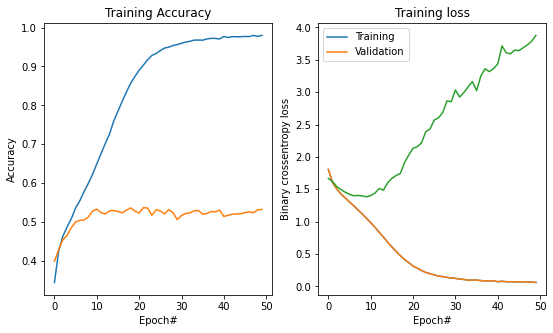

In [ ]:







# building the model

model_a=Sequential()
model_a.add(Dense(input_dim=x_train_f.shape[1],units=3072,activation='relu'))
model_a.add(Dense(units=4096,activation='relu'))
model_a.add(Dense(units=1024,activation='relu'))
model_a.add(Dense(units=len(classes),activation='softmax'))
model_a.summary()
model_a.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['acc'])

history=model_a.fit(x_train_f,y_train_c,
                   batch_size=16,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val_f,y_val_c))              
score=model_a.evaluate(x_test_f,y_test_c)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])
plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['acc'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_acc'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)




Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_47 (Dense)             (None, 4096)              12587008  
_________________________________________________________________
dropout_19 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                10250     
Total params: 26,232,842
Trainable params: 26,232,842
Non-trainable params: 0
_________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


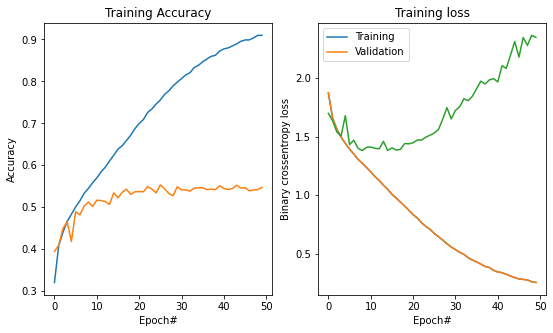

In [ ]:
model_b=Sequential()
model_b.add(Dense(input_dim=x_train_f.shape[1],units=3072,activation='relu'))
model_b.add(Dense(units=4096,activation='relu'))
model_b.add(Dropout(0.5))
model_b.add(Dense(units=1024,activation='relu'))
model_b.add(Dropout(0.1))
model_b.add(Dense(units=len(classes),activation='softmax'))
model_b.summary()
model_b.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['acc'])

history=model_b.fit(x_train_f,y_train_c,
                   batch_size=16,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val_f,y_val_c))              
score=model_b.evaluate(x_test_f,y_test_c)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])
plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['acc'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_acc'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_25 (Dense)             (None, 4096)              12587008  
_________________________________________________________________
dropout_12 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                10250     
Total params: 26,232,842
Trainable params: 26,232,842
Non-trainable params: 0
_________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


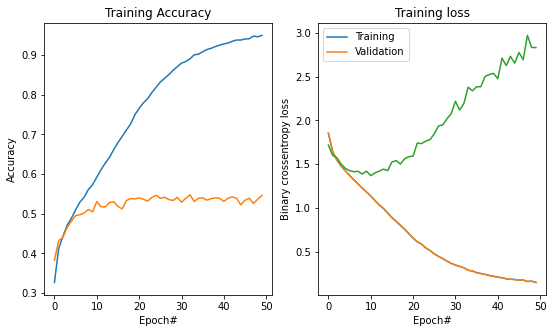

In [ ]:
model_c=Sequential()
model_c.add(Dense(input_dim=x_train_f.shape[1],units=3072,activation='relu'))
model_c.add(Dense(units=4096,activation='relu'))
model_c.add(Dropout(0.3))
model_c.add(Dense(units=1024,activation='relu'))
model_c.add(Dropout(0.2))
model_c.add(Dense(units=len(classes),activation='softmax'))
model_c.summary()
model_c.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['acc'])

history=model_c.fit(x_train_f,y_train_c,
                   batch_size=16,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val_f,y_val_c))              
score=model_c.evaluate(x_test_f,y_test_c)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])
plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['acc'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_acc'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_19 (Dense)             (None, 10000)             30730000  
_________________________________________________________________
dropout_9 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10250     
Total params: 50,421,530
Trainable params: 50,421,530
Non-trainable params: 0
_________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


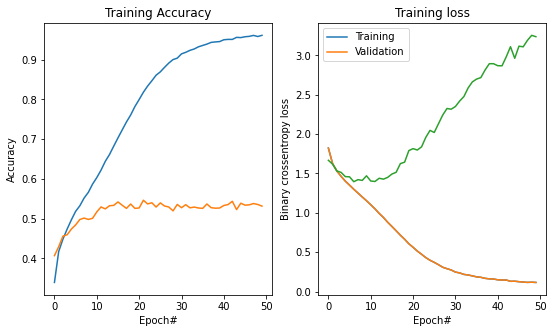

In [ ]:
model_d=Sequential()
model_d.add(Dense(input_dim=x_train_f.shape[1],units=3072,activation='relu'))
model_d.add(Dense(units=10000,activation='relu'))
model_d.add(Dropout(0.3))
model_d.add(Dense(units=1024,activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(Dense(units=len(classes),activation='softmax'))
model_d.summary()
model_d.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['acc'])

history=model_d.fit(x_train_f,y_train_c,
                   batch_size=16,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val_f,y_val_c))              
score=model_d.evaluate(x_test_f,y_test_c)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])
plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['acc'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_acc'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_37 (Dense)             (None, 10000)             30730000  
_________________________________________________________________
dropout_16 (Dropout)         (None, 10000)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 2000)              20002000  
_________________________________________________________________
dropout_17 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                20010     
Total params: 60,192,266
Trainable params: 60,192,266
Non-trainable params: 0
_________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


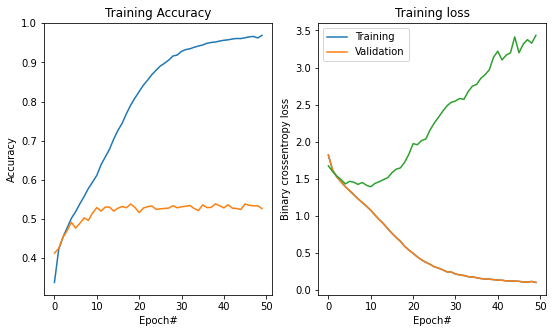

In [ ]:
model_e=Sequential()
model_e.add(Dense(input_dim=x_train_f.shape[1],units=3072,activation='relu'))
model_e.add(Dense(units=10000,activation='relu'))
model_e.add(Dropout(0.3))
model_e.add(Dense(units=2000,activation='relu'))
model_e.add(Dropout(0.2))
model_e.add(Dense(units=len(classes),activation='softmax'))
model_e.summary()
model_e.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['acc'])

history=model_e.fit(x_train_f,y_train_c,
                   batch_size=16,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val_f,y_val_c))              
score=model_e.evaluate(x_test_f,y_test_c)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])
plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['acc'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_acc'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_41 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_42 (Activation)   (None, 15, 15, 64)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


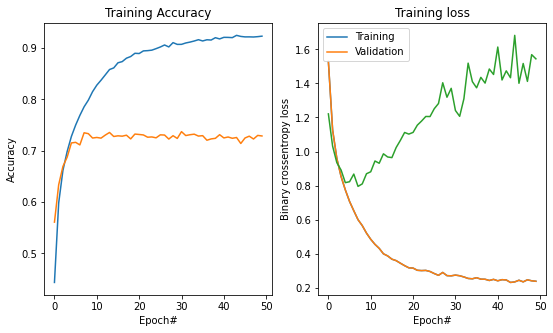

In [ ]:
model_cnn1=Sequential()
model_cnn1.add(Conv2D(32,(3,3), padding='same',
                   input_shape=x_train.shape[1:]))
model_cnn1.add(Activation('relu'))
model_cnn1.add(Conv2D(32,(3,3), padding='valid'))
model_cnn1.add(Activation('relu'))
model_cnn1.add(MaxPooling2D(pool_size=(2,2)))

model_cnn1.add(Conv2D(64,(3,3), padding='same'))
model_cnn1.add(Activation('relu'))
model_cnn1.add(Conv2D(32,(3,3), padding='valid'))
model_cnn1.add(Activation('relu'))
model_cnn1.add(MaxPooling2D(pool_size=(2,2)))


model_cnn1.add(Flatten())
model_cnn1.add(Dense(units=512,activation='relu'))
model_cnn1.add(Dropout(0.5))
model_cnn1.add(Dense(units=len(classes), activation='softmax'))

model_cnn1.summary()
model_cnn1.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.001),
                metrics=['acc'])

history=model_cnn1.fit(x_train,y_train_c,
                   batch_size=16,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val,y_val_c))

score=model_cnn1.evaluate(x_test,y_test_c)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])
plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['acc'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_acc'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_37 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_38 (Activation)   (None, 15, 15, 64)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


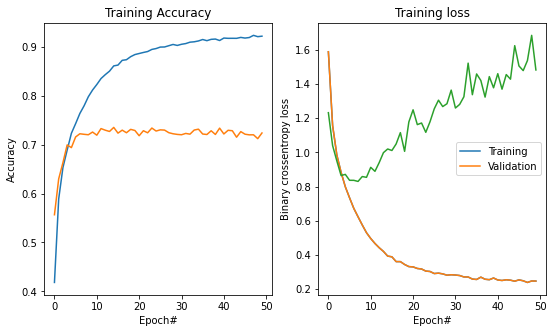

In [ ]:

model_cnn=Sequential()
model_cnn.add(Conv2D(32,(3,3), padding='same',
                   input_shape=x_train.shape[1:]))
model_cnn.add(Activation('relu'))
model_cnn.add(Conv2D(32,(3,3), padding='valid'))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(64,(3,3), padding='same'))
model_cnn.add(Activation('relu'))
model_cnn.add(Conv2D(32,(3,3), padding='valid'))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


model_cnn.add(Flatten())
model_cnn.add(Dense(units=512,activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(units=len(classes), activation='softmax'))

model_cnn.summary()
model_cnn.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.001),
                metrics=['acc'])

save_path='/content/drive/My Drive/model_c.Hw_CAP4613'
callbacks_save=ModelCheckpoint(save_path,monitor='val_loss',verbose=0,save_best_only=True,period=1)

history=model_cnn.fit(x_train,y_train_c,
                   batch_size=16,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val,y_val_c),
                   callbacks=[callbacks_save])
model_cnn=load_model(save_path)
score=model_cnn.evaluate(x_test,y_test_c)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])
plt.figure(figsize=[9,5])
acc_curve_train=np.array(history.history['acc'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_acc'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)


In [ ]:
# model_a=Sequential()
# model_a.add(Conv2D(32,(3,3), padding='same',
#                    input_shape=x_train[1:], use_bias=False))
# model_a.add(BatchNormalization())
# model_a.add(Activation('relu'))
# model_a.add(Conv2D(32,(3,3), padding='same', use_bias=False))
# model_a.add(BatchNormalization())
# model_a.add(Activation('relu'))
# model_a.add(MaxPool2D(pool_size=(2,2)))

# model_a.add(Conv2D(64,(3,3), padding='same', use_bias=False))
# model_a.add(BatchNormalization())
# model_a.add(Activation('relu'))
# model_a.add(Conv2D(64,(3,3), padding='same', use_bias=False))
# model_a.add(BatchNormalization())
# model_a.add(Activation('relu'))
# model_a.add(MaxPool2D(pool_size=(2,2)))


# model_a.add(Flatten())
# model_a.add(Dense(units=512))
# model_a.add(BatchNormalization())
# model_a.add(Activation('relu'))
# model_a.add(Dropout(0.5))
# model_a.add(Dense(units=len(classes)))
# model_a.add(BatchNormalization())
# model_a.add(Activation('softmax'))
# model_a.summary()